In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#taking inputs images for training
img_size = 56
base_path = "images/images/"

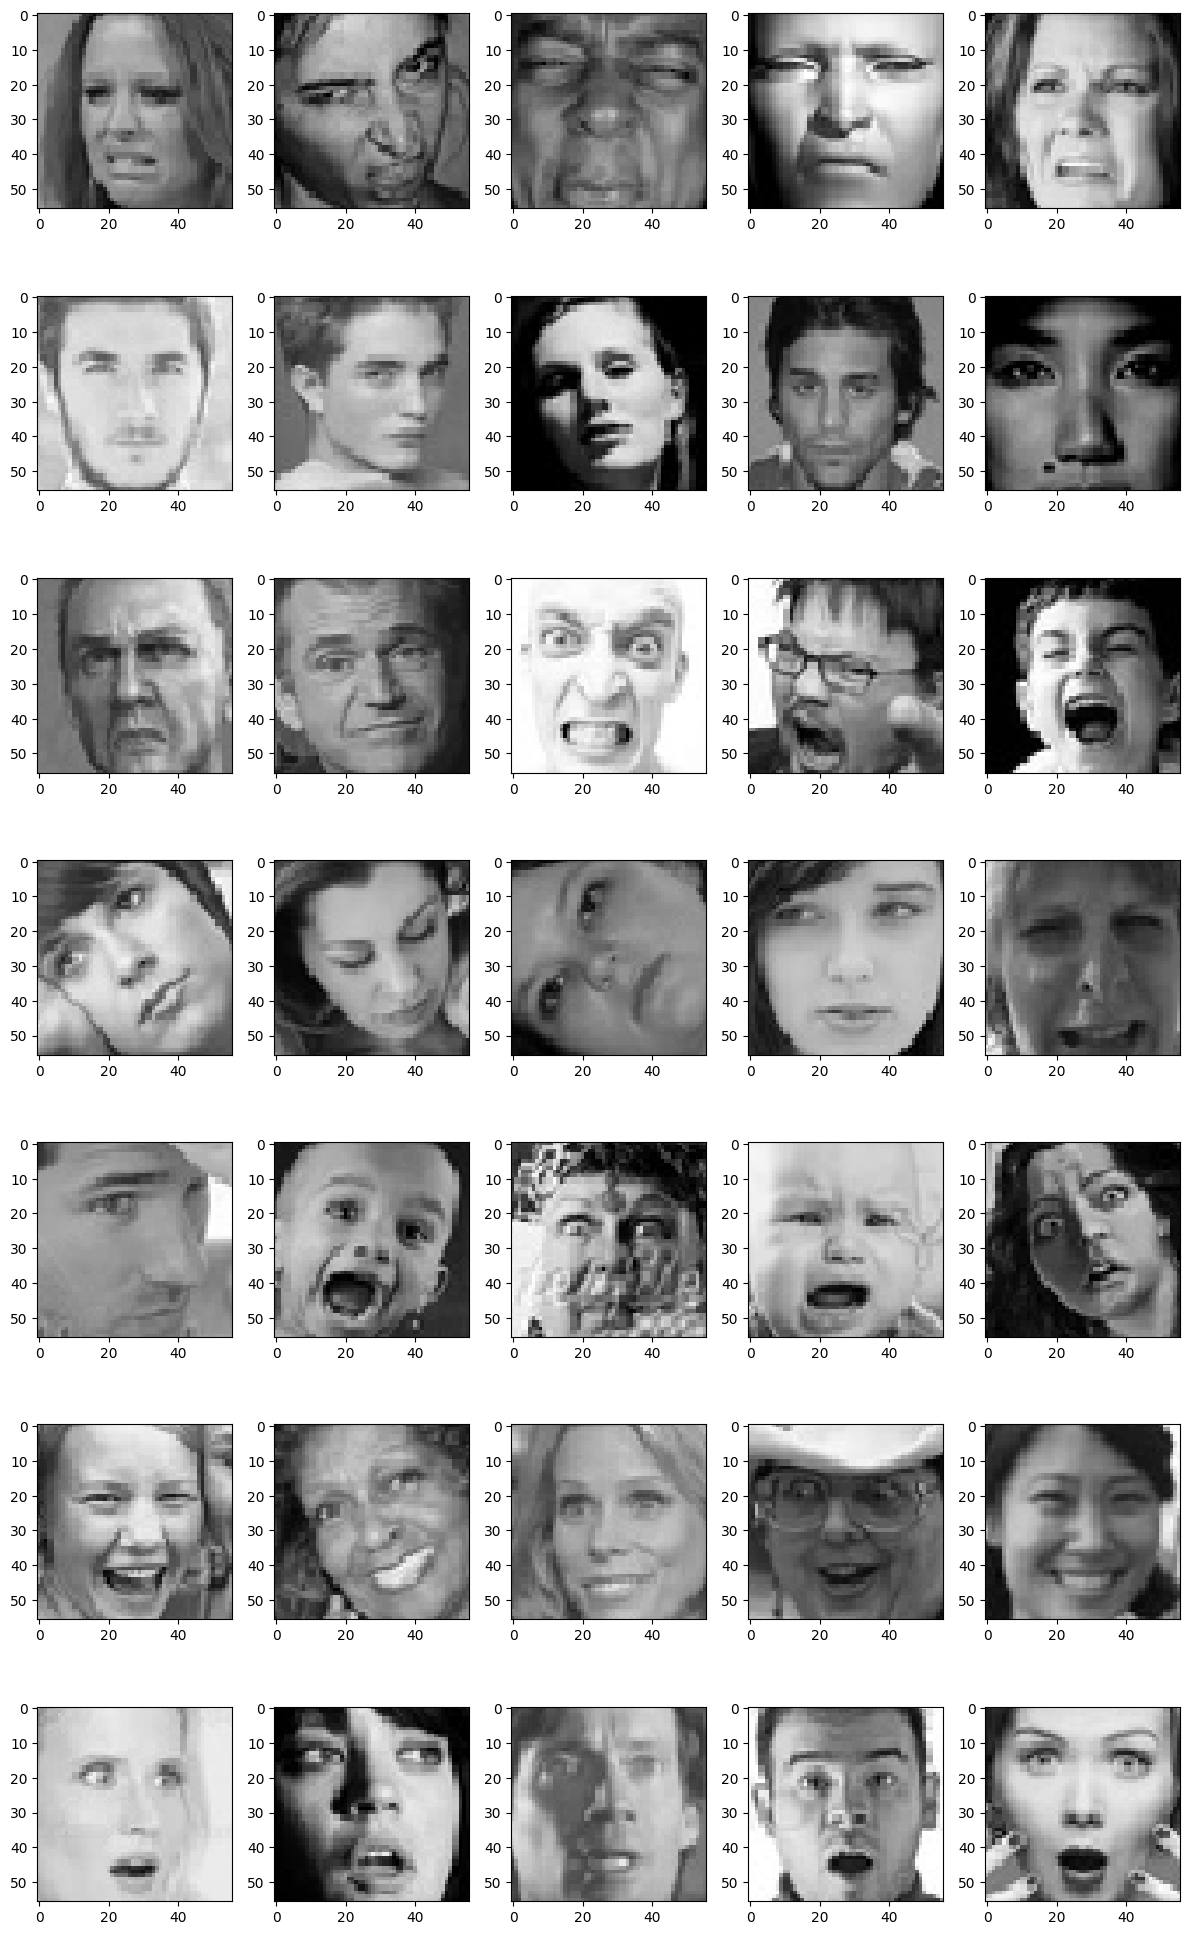

In [ ]:
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

436 disgust images
4982 neutral images
3993 angry images
4938 sad images
4103 fear images
7164 happy images
3205 surprise images


Image Augmentation

In [ ]:
# building data generator

from keras.preprocessing.image import ImageDataGenerator

batch_size = 128

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                    target_size=(img_size,img_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


##usinG Resnet Model

In [ ]:
num_classes = len(os.listdir(base_path + "train/"))
num_classes

7

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Example input shape (for grayscale converted to RGB)
input_shape = (56, 56, 3)  # RGB format

# Define the model
inputs = Input(shape=input_shape)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(56, 56, 3))

# Optional: Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 25693063 (98.01 MB)
Trainable params: 2105351 (8

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

initial_learning_rate = 0.1
decay_rate = 0.9

def lr_schedule(epoch):

    if epoch <5 :
        return initial_learning_rate
    else:
        return 0.01 * initial_learning_rate
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/20
226/226 [==============================] - 46s 206ms/step - loss: 1.7287 - accuracy: 0.2986 - val_loss: 1.7005 - val_accuracy: 0.3312
Epoch 2/20
226/226 [==============================] - 46s 205ms/step - loss: 1.7325 - accuracy: 0.2961 - val_loss: 1.7055 - val_accuracy: 0.3111
Epoch 3/20
226/226 [==============================] - 47s 209ms/step - loss: 1.7277 - accuracy: 0.3025 - val_loss: 1.6945 - val_accuracy: 0.3306
Epoch 4/20
226/226 [==============================] - 46s 202ms/step - loss: 1.7306 - accuracy: 0.3004 - val_loss: 1.6929 - val_accuracy: 0.3264
Epoch 5/20
226/226 [==============================] - 45s 197ms/step - loss: 1.7282 - accuracy: 0.2985 - val_loss: 1.7078 - val_accuracy: 0.3169
Epoch 6/20
 68/226 [========>.....................] - ETA: 28s - loss: 1.7294 - accuracy: 0.2962